# Exploratory Data Analysis

This notebook performs essential exploratory data analysis (EDA) on our dataset and demonstrates techniques to improve notebook aesthetics.

## Load Required Libraries

Let's import all the necessary libraries for our analysis:

In [20]:
%pip install pandas numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For advanced visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Display settings configured: All warnings suppressed and full DataFrame display enabled.")

Display settings configured: All warnings suppressed and full DataFrame display enabled.


## Data Loading and Initial Exploration

Let's load our EIA electricity data and weather data from the 10 cities.

In [23]:
import os
import json
from glob import glob

# Define the path for the data files
dataset_path = "./dataset/"

### Load EIA Balance Data

In [24]:
# Load EIA Balance Data
balance_files = sorted(glob(os.path.join(dataset_path, "EIA930_BALANCE_*.csv")))
print(f"Found {len(balance_files)} EIA Balance files: {balance_files}")

# Let's examine the first file to understand its structure
if balance_files:
    first_balance_file = balance_files[0]
    balance_sample = pd.read_csv(first_balance_file)
    
    # Display information about the first balance file
    print(f"\nEIA Balance Data Sample ({os.path.basename(first_balance_file)})")
    print(f"Shape: {balance_sample.shape} (rows, columns)")
    display(balance_sample.head())
    
    # Display schema information
    print("\nEIA Balance Data Schema")
    display(pd.DataFrame({
        'Column': balance_sample.columns,
        'Data Type': balance_sample.dtypes,
        'Non-Null Count': balance_sample.count(),
        'Null Count': balance_sample.isna().sum(),
        'Null %': (balance_sample.isna().sum() / len(balance_sample) * 100).round(2)
    }))

Found 4 EIA Balance files: ['./dataset/EIA930_BALANCE_2018_Jul_Dec.csv', './dataset/EIA930_BALANCE_2019_Jan_Jun.csv', './dataset/EIA930_BALANCE_2019_Jul_Dec.csv', './dataset/EIA930_BALANCE_2020_Jan_Jun.csv']

EIA Balance Data Sample (EIA930_BALANCE_2018_Jul_Dec.csv)
Shape: (290046, 23) (rows, columns)

EIA Balance Data Sample (EIA930_BALANCE_2018_Jul_Dec.csv)
Shape: (290046, 23) (rows, columns)


,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),Demand (MW) (Imputed),Net Generation (MW) (Imputed),Demand (MW) (Adjusted),Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
0,AEC,07/01/2018,1,07/01/2018 1:00:00 AM,07/01/2018 6:00:00 AM,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AEC,07/01/2018,2,07/01/2018 2:00:00 AM,07/01/2018 7:00:00 AM,NaN,NaN,NaN,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AEC,07/01/2018,3,07/01/2018 3:00:00 AM,07/01/2018 8:00:00 AM,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AEC,07/01/2018,4,07/01/2018 4:00:00 AM,07/01/2018 9:00:00 AM,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AEC,07/01/2018,5,07/01/2018 5:00:00 AM,07/01/2018 10:00:00 AM,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



EIA Balance Data Schema


,Column,Data Type,Non-Null Count,Null Count,Null %
Balancing Authority,Balancing Authority,object,290046,0,0.00
Data Date,Data Date,object,290046,0,0.00
Hour Number,Hour Number,int64,290046,0,0.00
Local Time at End of Hour,Local Time at End of Hour,object,290046,0,0.00
UTC Time at End of Hour,UTC Time at End of Hour,object,290046,0,0.00
Demand Forecast (MW),Demand Forecast (MW),object,239367,50679,17.47
Demand (MW),Demand (MW),object,240476,49570,17.09
Net Generation (MW),Net Generation (MW),object,280950,9096,3.14
Total Interchange (MW),Total Interchange (MW),object,281920,8126,2.80
Sum(Valid DIBAs) (MW),Sum(Valid DIBAs) (MW),object,281872,8174,2.82


### Load Weather Data for Cities

Now, let's explore the weather data for the 10 cities.

In [25]:
# Load city weather data from JSON files
city_files = sorted(glob(os.path.join(dataset_path, "*.json")))
print(f"Found {len(city_files)} city weather JSON files: {city_files}")

# Let's examine the first city file to understand its structure
if city_files:
    city_name = os.path.basename(city_files[0]).split('.')[0]
    try:
        with open(city_files[0], 'r') as f:
            city_data = json.load(f)
            
        # Display sample of the JSON structure
        print(f"\n{city_name.capitalize()} Weather Data Structure")
        if isinstance(city_data, list) and len(city_data) > 0:
            # If it's a list of records, show the first record
            display(pd.json_normalize(city_data[0:1]))
            print(f"Total records: {len(city_data)}")
        elif isinstance(city_data, dict):
            # For a nested structure, show keys at the top level
            print(f"Top-level keys in the JSON data: {list(city_data.keys())}")
            
            # If there's hourly or daily data, display it
            if 'hourly' in city_data and len(city_data['hourly']) > 0:
                hourly_df = pd.json_normalize(city_data['hourly'][0:1])
                print("\nSample Hourly Weather Data")
                display(hourly_df)
                print(f"Total hourly records: {len(city_data['hourly'])}")
            elif 'daily' in city_data and len(city_data['daily']) > 0:
                daily_df = pd.json_normalize(city_data['daily'][0:1])
                print("\nSample Daily Weather Data")
                display(daily_df)
                print(f"Total daily records: {len(city_data['daily'])}")
    except Exception as e:
        print(f"Error loading {city_name} data: {e}")

Found 10 city weather JSON files: ['./dataset/dallas.json', './dataset/houston.json', './dataset/la.json', './dataset/nyc.json', './dataset/philadelphia.json', './dataset/phoenix.json', './dataset/san_antonio.json', './dataset/san_diego.json', './dataset/san_jose.json', './dataset/seattle.json']

Dallas Weather Data Structure


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility
0,1530507600,Clear,clear-night,0,0,89.56,91.71,65.31,0.45,1011.90,10.84,12.40,164,0.06,0,9.62


Total records: 16574


### Load Texas Data

Let's also look at the Texas-specific electricity data.

In [26]:
# Load Texas Data
texas_files = sorted(glob(os.path.join(dataset_path, "texas20*.csv")))
print(f"Found {len(texas_files)} Texas files: {texas_files}")

# Examine the first Texas file
if texas_files:
    texas_sample = pd.read_csv(texas_files[0])
    print(f"\nTexas Electricity Data Sample ({os.path.basename(texas_files[0])})")
    print(f"Shape: {texas_sample.shape} (rows, columns)")
    display(texas_sample.head())

Found 3 Texas files: ['./dataset/texas2018.csv', './dataset/texas2019.csv', './dataset/texas2020.csv']

Texas Electricity Data Sample (texas2018.csv)
Shape: (8760, 10) (rows, columns)


,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2018 01:00,"11,425.98","1,852.66","2,823.41","1,135.36","18,584.34","3,831.65","9,151.19","1,762.47","50,567.07"
1,01/01/2018 02:00,"11,408.42","1,850.17","2,809.75","1,136.63","18,524.14","3,988.27","9,144.99","1,754.72","50,617.09"
2,01/01/2018 03:00,"11,405.20","1,858.27","2,797.80","1,135.93","18,532.06","4,076.09","9,141.04","1,747.92","50,694.30"
3,01/01/2018 04:00,"11,450.56","1,879.62","2,807.79","1,146.07","18,647.44","4,154.94","9,157.96","1,755.20","50,999.59"
4,01/01/2018 05:00,"11,631.34","1,876.48","2,822.99","1,154.19","19,002.10","4,247.45","9,214.33","1,774.85","51,723.73"


## Let's load the cleaned data for analysis

We'll first check if the cleaned data files exist in our dataset directory.

In [ ]:
cleaned_files = {
    'balance': os.path.join(dataset_path, 'cleaned_balance_data.csv'),
    'subregion': os.path.join(dataset_path, 'cleaned_subregion_data.csv'),
    'texas': os.path.join(dataset_path, 'cleaned_texas_data.csv')
}

data = {}

for key, filepath in cleaned_files.items():
    if os.path.exists(filepath):
        print(f"Loading {key} data from {os.path.basename(filepath)}")
        data[key] = pd.read_csv(filepath)
        print(f"Shape: {data[key].shape}")
    else:
        print(f"Cleaned {key} data file not found: {os.path.basename(filepath)}")

if not data:
    print("\nNo cleaned data files found. Loading sample raw data instead.")
    if balance_files:
        data['balance'] = pd.read_csv(balance_files[0])
        print(f"Loaded raw balance data from {os.path.basename(balance_files[0])}")
    if texas_files:
        data['texas'] = pd.read_csv(texas_files[0])
        print(f"Loaded raw Texas data from {os.path.basename(texas_files[0])}")

if 'balance' in data:
    df = data['balance']
    print(f"\nUsing balance data for analysis with shape: {df.shape}")
elif 'texas' in data:
    df = data['texas']
    print(f"\nUsing texas data for analysis with shape: {df.shape}")
else:
    print("\nNo data available. Creating a sample dataframe for demonstration.")
    df = pd.DataFrame({
        'A': np.random.rand(100),
        'B': np.random.rand(100),
        'C': np.random.choice(['X', 'Y', 'Z'], 100),
        'D': pd.date_range('2020-01-01', periods=100, freq='D')
    })

Loading balance data from cleaned_balance_data.csv
Shape: (31920, 5)
Loading subregion data from cleaned_subregion_data.csv
Shape: (132288, 6)
Loading texas data from cleaned_texas_data.csv
Shape: (20423, 4)

Using balance data for analysis with shape: (31920, 5)
Shape: (132288, 6)
Loading texas data from cleaned_texas_data.csv
Shape: (20423, 4)

Using balance data for analysis with shape: (31920, 5)


## Check for Missing Values

Columns with Missing Values:


,Missing Values,Percentage (%)
demand,76,0.24


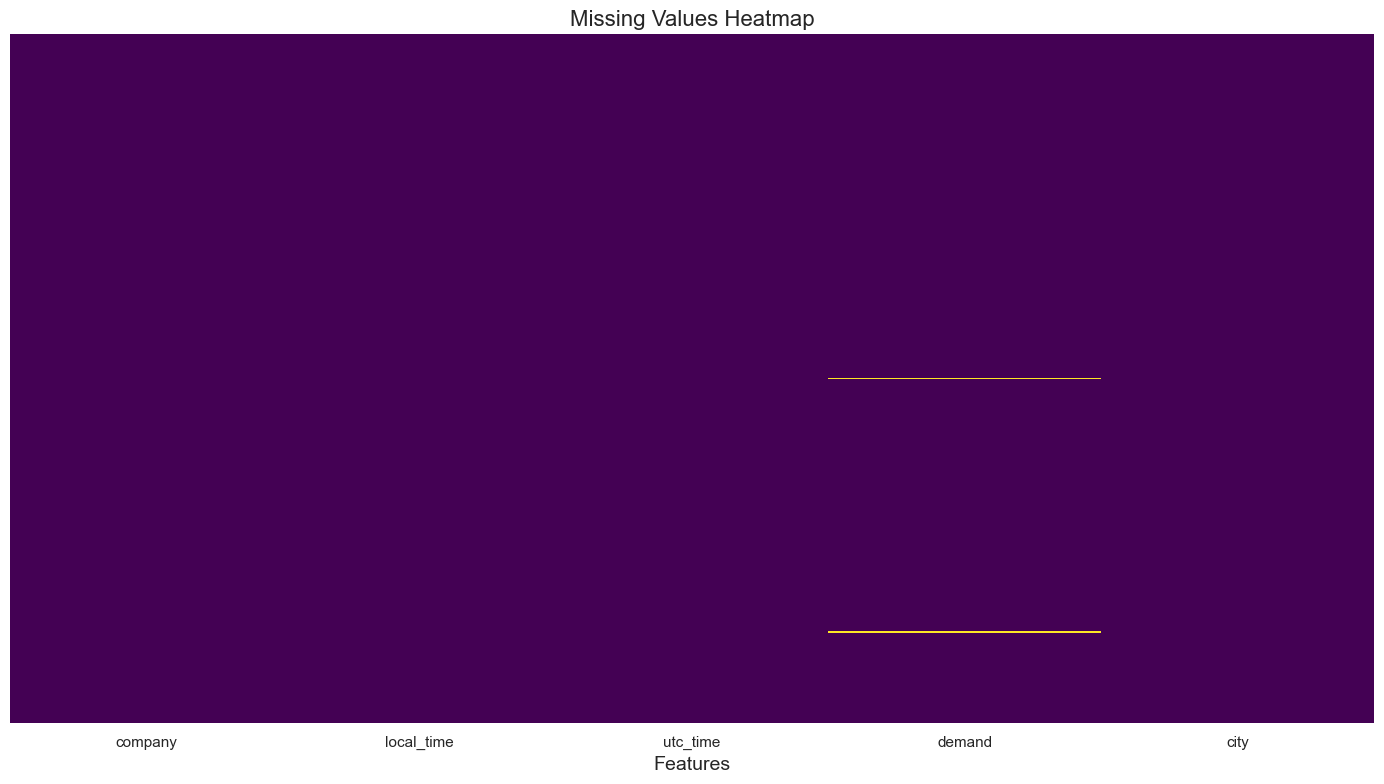

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})

missing_cols = missing_df[missing_df['Missing Values'] > 0]

if len(missing_cols) > 0:
    print("Columns with Missing Values:")
    display(missing_cols)
    
    # Visualize missing values
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No Missing Values Found")

## Summary Statistics


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

if not numeric_columns.empty:
    print("Summary Statistics for Numerical Columns:")
    display(numeric_columns.describe().round(2))
    
    # Enhanced summary statistics with additional metrics
    print("\nExtended Statistics:")
    extended_stats = pd.DataFrame({
        'Mean': numeric_columns.mean(),
        'Median': numeric_columns.median(),
        'Std Dev': numeric_columns.std(),
        'Skewness': numeric_columns.skew(),
        'Kurtosis': numeric_columns.kurtosis(),
        'Min': numeric_columns.min(),
        'Max': numeric_columns.max()
    }).round(2)
    
    display(extended_stats)
else:
    print("No numerical columns found in the dataset")

# Display statistics for categorical columns if present
categorical_columns = df.select_dtypes(include=['object', 'category'])

if not categorical_columns.empty:
    print("\nCategorical Columns Statistics:")
    
    for col in categorical_columns.columns:
        value_counts = df[col].value_counts()
        unique_count = df[col].nunique()
        
        print(f"\nColumn: {col}")
        print(f"Number of unique values: {unique_count}")
        print(f"Top 5 most frequent values:")
        display(value_counts.head(5))

Summary Statistics for Numerical Columns:


,demand
count,31844.00
mean,2226.48
std,1472.38
min,-1340.00
25%,1077.00
50%,1830.00
75%,3020.00
max,101412.00



Extended Statistics:


,Mean,Median,Std Dev,Skewness,Kurtosis,Min,Max
demand,2226.48,1830.00,1472.38,10.40,646.40,-1340.00,101412.00



Categorical Columns Statistics:

Column: company
Number of unique values: 2
Top 5 most frequent values:


company
AZPS    15960
SCL     15960
Name: count, dtype: int64


Column: local_time
Number of unique values: 15960
Top 5 most frequent values:


local_time
2019-11-03 01:00:00    3
2018-11-04 01:00:00    3
2018-07-01 01:00:00    2
2019-09-17 13:00:00    2
2019-09-17 01:00:00    2
Name: count, dtype: int64


Column: utc_time
Number of unique values: 15960
Top 5 most frequent values:


utc_time
2018-07-01 08:00:00    2
2019-09-17 21:00:00    2
2019-09-17 08:00:00    2
2019-09-17 09:00:00    2
2019-09-17 10:00:00    2
Name: count, dtype: int64


Column: city
Number of unique values: 2
Top 5 most frequent values:


city
phoenix    15960
seattle    15960
Name: count, dtype: int64

## Visualize Data Distributions


Distribution of Numerical Features:


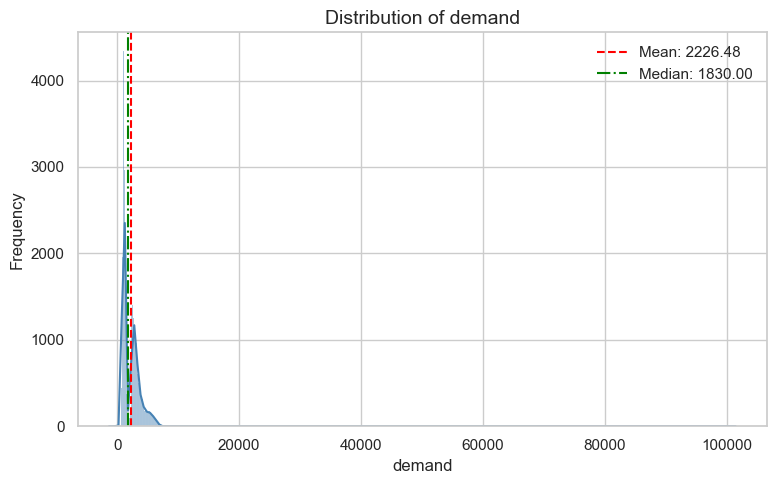


Box Plots for Numerical Features:


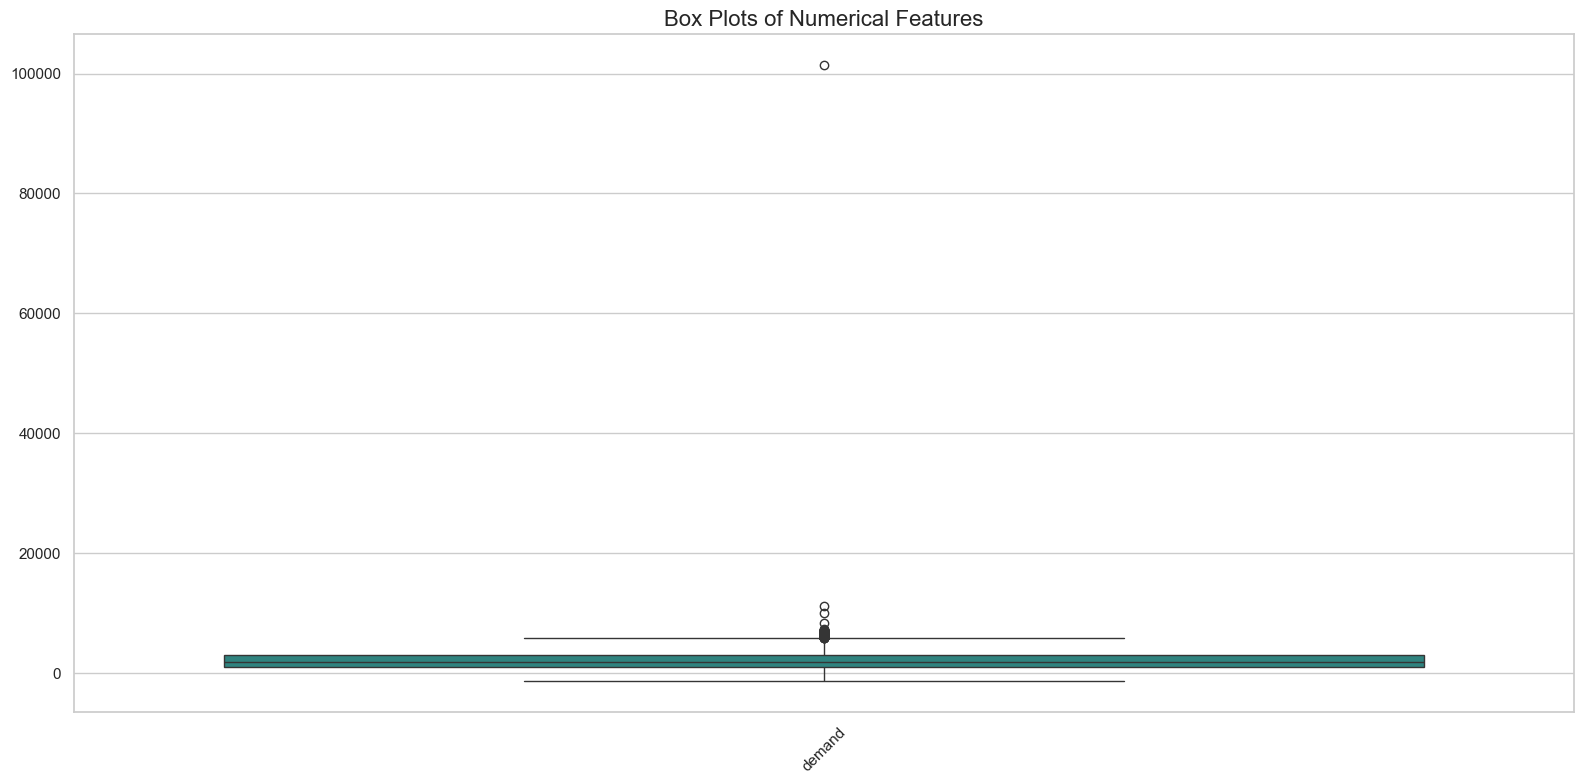


Distribution of Categorical Features:


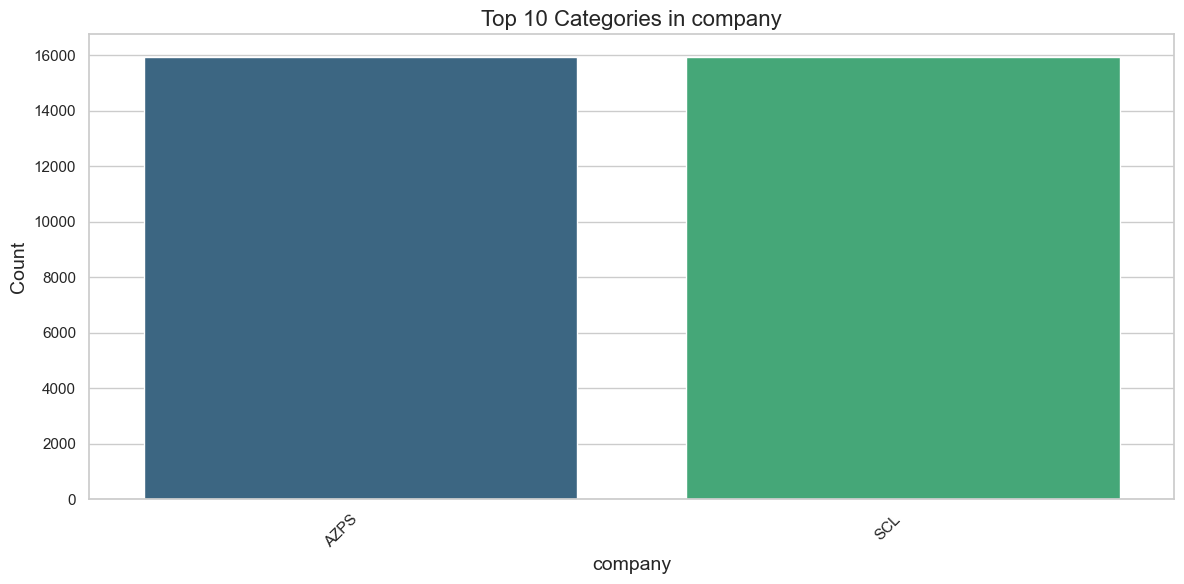

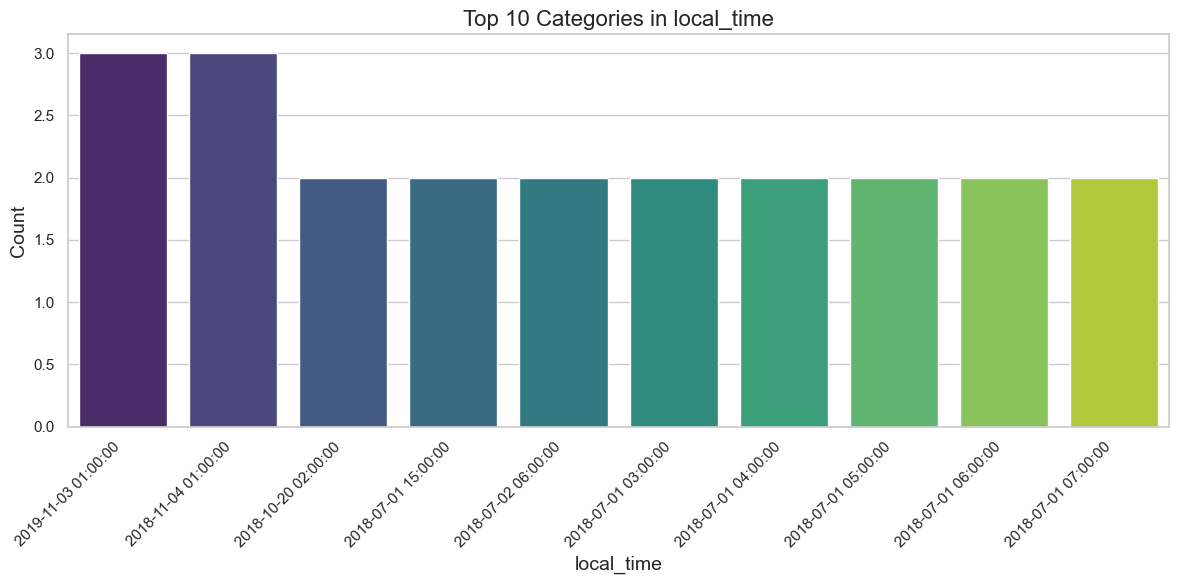

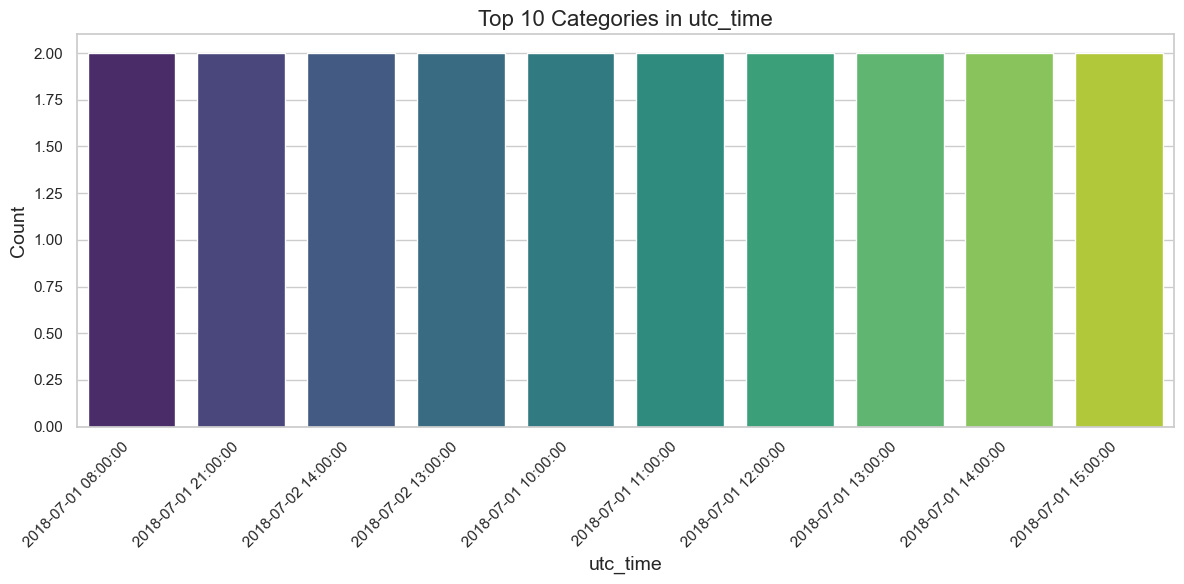

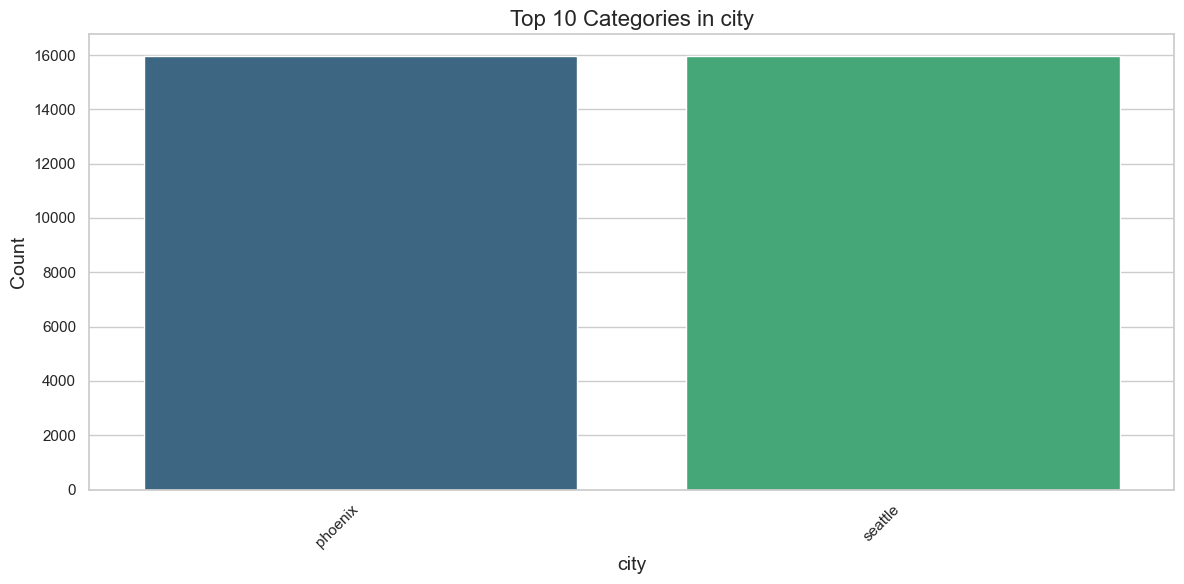

In [ ]:
def plot_distributions(dataframe, columns, n_cols=2):
    if not columns:
        print("No columns provided for plotting")
        return
        
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Handle the case where there's only one row
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    
    for i, col in enumerate(columns):
        if i < len(axes):
            sns.histplot(dataframe[col], kde=True, ax=axes[i], color='steelblue')
            axes[i].set_title(f'Distribution of {col}', fontsize=14)
            axes[i].set_xlabel(col, fontsize=12)
            axes[i].set_ylabel('Frequency', fontsize=12)
            
            # Add mean and median lines
            mean_val = dataframe[col].mean()
            median_val = dataframe[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
            axes[i].legend()
    
    # Hide empty subplots
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols_to_plot = num_cols[:8] if len(num_cols) > 0 else []

if cols_to_plot:
    print("Distribution of Numerical Features:")
    plot_distributions(df, cols_to_plot)
    
    print("\nBox Plots for Numerical Features:")
    plt.figure(figsize=(16, 8))
    sns.boxplot(data=df[cols_to_plot], palette='viridis')
    plt.title('Box Plots of Numerical Features', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for distribution plots")

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()[:4]

if cat_cols:
    print("\nDistribution of Categorical Features:")
    
    for col in cat_cols:
        plt.figure(figsize=(12, 6))
        value_counts = df[col].value_counts().sort_values(ascending=False).head(10)
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Top 10 Categories in {col}', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Correlation Heatmap

Let's generate a correlation heatmap to visualize the relationships between numerical features.

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

if len(numeric_columns.columns) > 1:
    print("Correlation Analysis:")
    
    # Calculate correlation matrix
    corr_matrix = numeric_columns.corr().round(2)
    
    # Plot the correlation heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(
        corr_matrix, 
        mask=mask,
        annot=True,
        cmap=cmap,
        linewidths=0.5,
        fmt=".2f",
        vmin=-1, 
        vmax=1, 
        center=0,
        square=True
    )
    
    plt.title('Correlation Matrix Heatmap', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Identify highly correlated features
    high_corr_threshold = 0.7
    high_corr_features = []
    
    # Get pairs of features with correlation above threshold (excluding self-correlation)
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
                high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    if high_corr_features:
        print("\nHighly Correlated Features (|r| ≥ 0.7):")
        high_corr_df = pd.DataFrame(high_corr_features, columns=['Feature 1', 'Feature 2', 'Correlation'])
        display(high_corr_df.sort_values(by='Correlation', ascending=False, key=abs))
    else:
        print("\nNo highly correlated features found (threshold = 0.7)")
else:
    print("Insufficient numerical columns for correlation analysis")
    print("Correlation analysis requires at least 2 numerical columns.")

Insufficient numerical columns for correlation analysis
Correlation analysis requires at least 2 numerical columns.


## Time Series Analysis 

Found datetime column: local_time
Converted local_time to datetime format


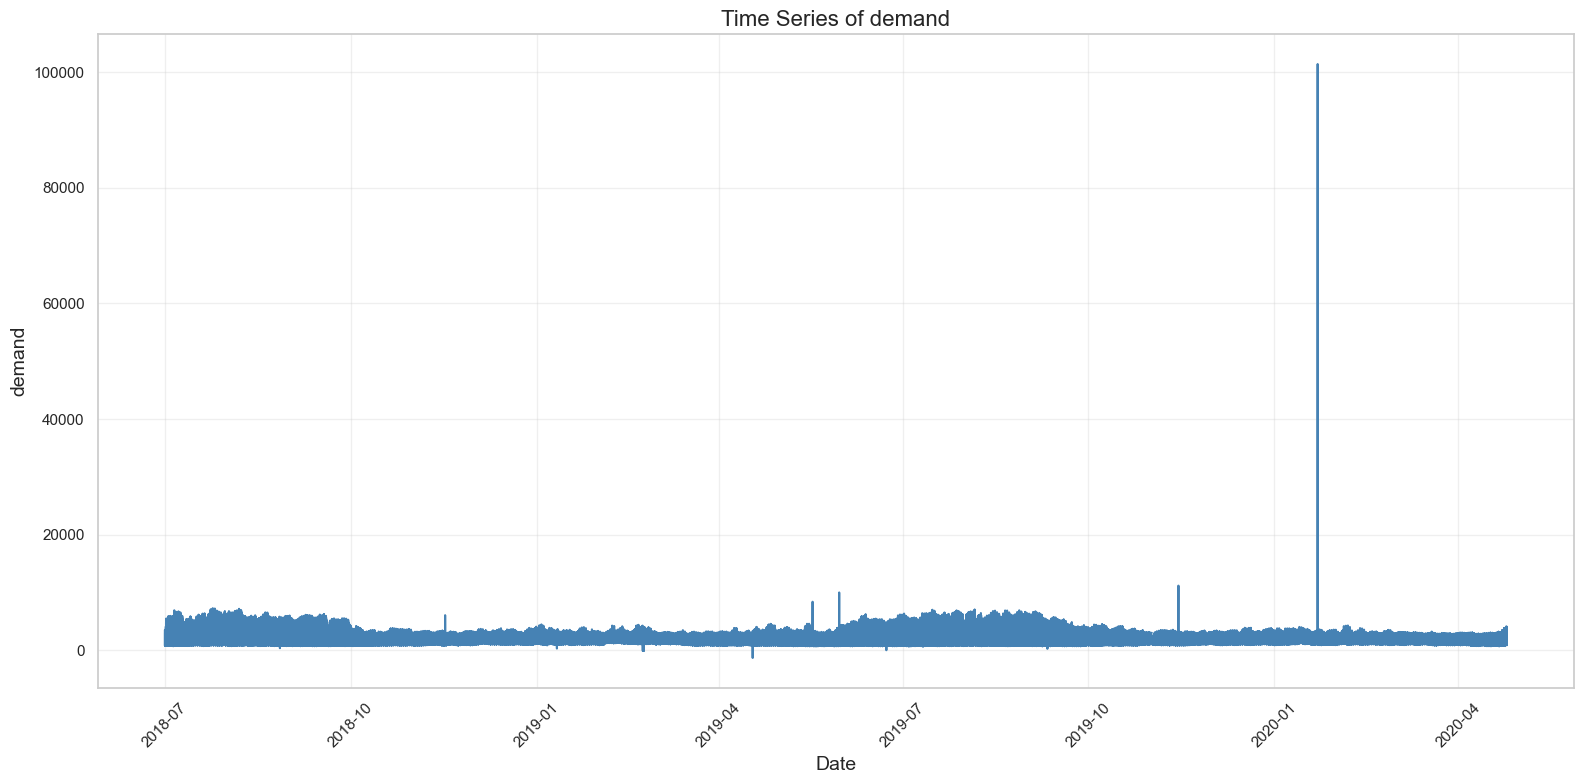


Analyzing patterns by hour of day:


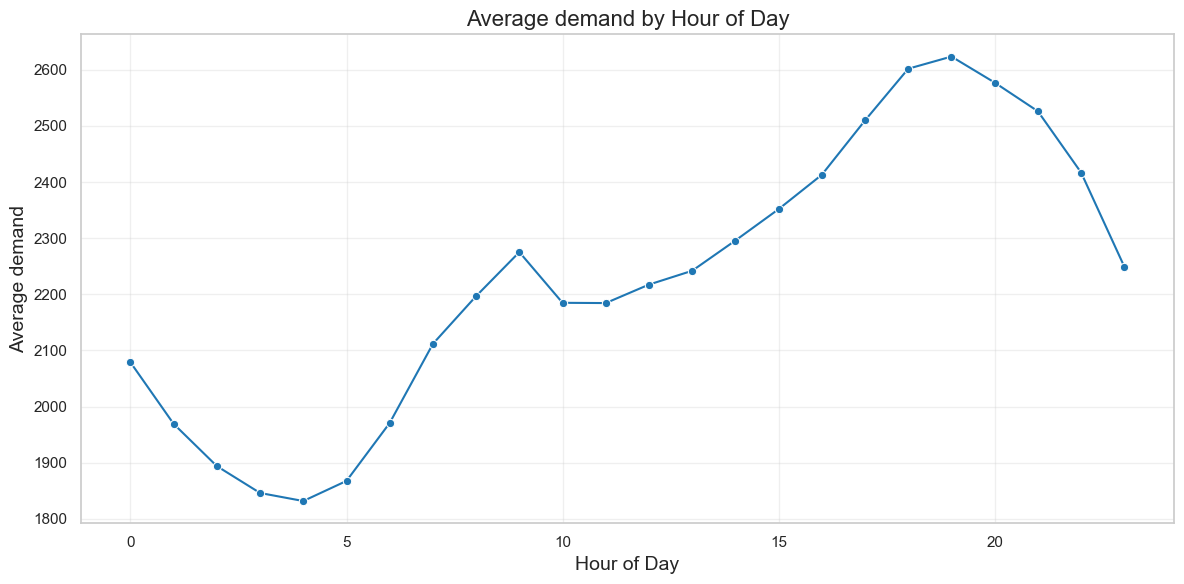


Analyzing patterns by day of week:


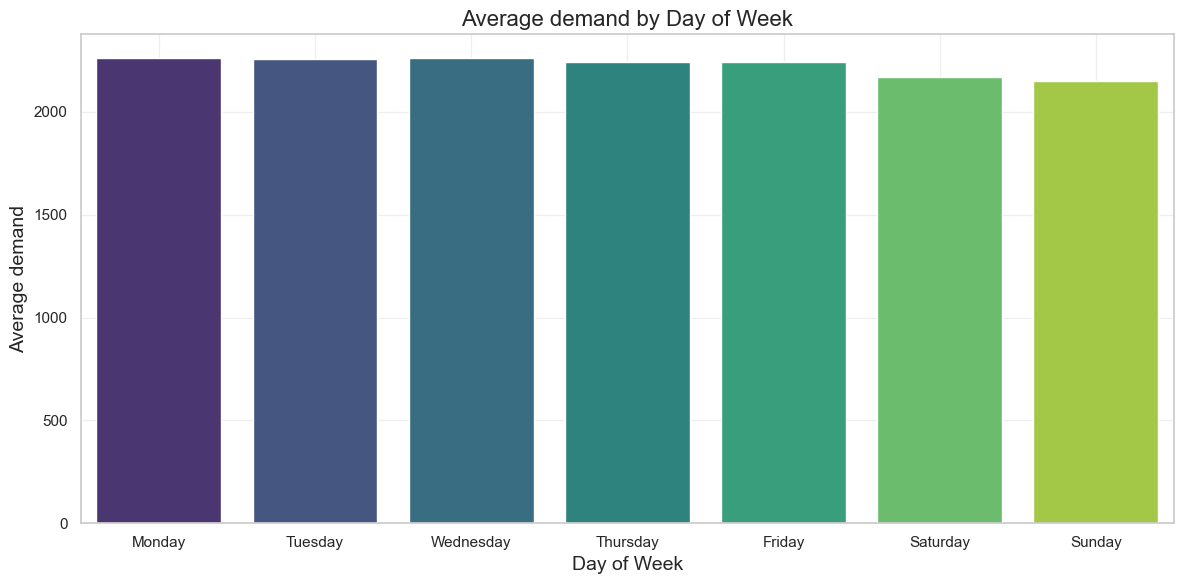


Analyzing patterns by month:


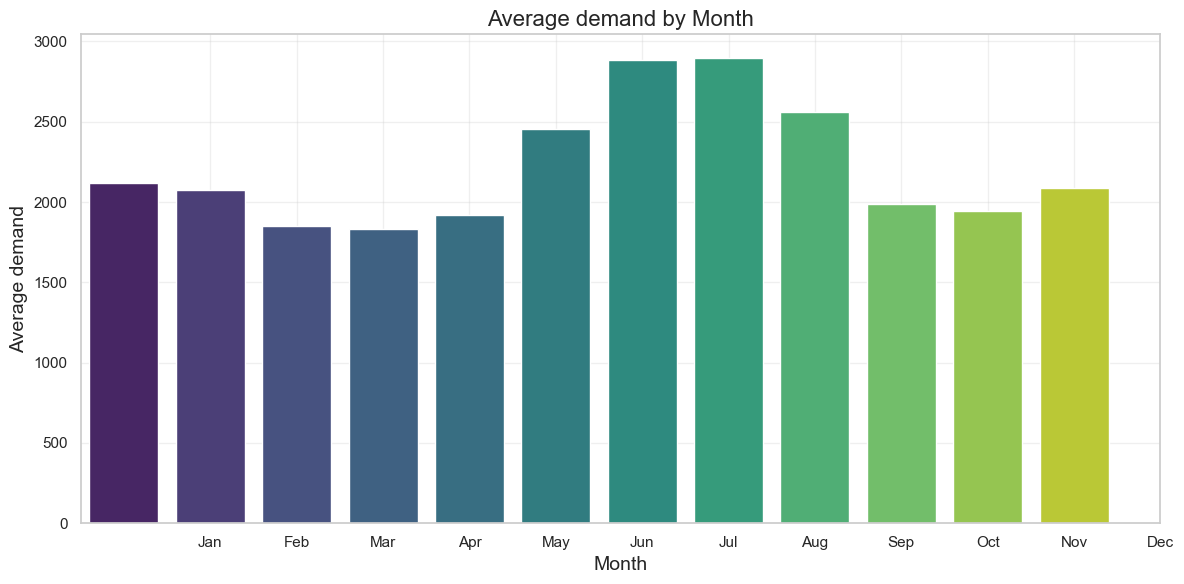

In [32]:
# Identify potential datetime columns
datetime_cols = [col for col in df.columns if any(term in col.lower() for term in ['date', 'time', 'dt'])]

if datetime_cols:
    datetime_col = datetime_cols[0]
    print(f"Found datetime column: {datetime_col}")
    
    # Convert to datetime if it's not already
    if not pd.api.types.is_datetime64_dtype(df[datetime_col]):
        try:
            df[datetime_col] = pd.to_datetime(df[datetime_col])
            print(f"Converted {datetime_col} to datetime format")
        except Exception as e:
            print(f"Could not convert to datetime: {e}")
    
    # If conversion successful, do time series analysis
    if pd.api.types.is_datetime64_dtype(df[datetime_col]):
        # Sort by datetime
        df_sorted = df.sort_values(by=datetime_col)
        
        # Identify a potential target column (numerical)
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        
        if numerical_cols:
            target_col = numerical_cols[0]  # Just use the first one for demo
            
            # Plot the time series
            plt.figure(figsize=(16, 8))
            plt.plot(df_sorted[datetime_col], df_sorted[target_col], color='steelblue')
            plt.title(f'Time Series of {target_col}', fontsize=16)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel(target_col, fontsize=14)
            plt.grid(True, alpha=0.3)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Extract time components
            df_ts = df_sorted.copy()
            df_ts['hour'] = df_ts[datetime_col].dt.hour
            df_ts['day'] = df_ts[datetime_col].dt.day
            df_ts['month'] = df_ts[datetime_col].dt.month
            df_ts['year'] = df_ts[datetime_col].dt.year
            df_ts['dayofweek'] = df_ts[datetime_col].dt.dayofweek
            
            # Plot by hour of day if we have enough data
            if df_ts['hour'].nunique() > 1:
                print("\nAnalyzing patterns by hour of day:")
                hourly_pattern = df_ts.groupby('hour')[target_col].mean()
                
                plt.figure(figsize=(12, 6))
                sns.lineplot(x=hourly_pattern.index, y=hourly_pattern.values, marker='o')
                plt.title(f'Average {target_col} by Hour of Day', fontsize=16)
                plt.xlabel('Hour of Day', fontsize=14)
                plt.ylabel(f'Average {target_col}', fontsize=14)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            
            # Plot by day of week if we have enough data
            if df_ts['dayofweek'].nunique() > 1:
                print("\nAnalyzing patterns by day of week:")
                daily_pattern = df_ts.groupby('dayofweek')[target_col].mean()
                
                days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                
                plt.figure(figsize=(12, 6))
                sns.barplot(x=daily_pattern.index, y=daily_pattern.values, palette='viridis')
                plt.title(f'Average {target_col} by Day of Week', fontsize=16)
                plt.xlabel('Day of Week', fontsize=14)
                plt.ylabel(f'Average {target_col}', fontsize=14)
                plt.xticks(range(7), days)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            
            # Plot by month if we have enough data
            if df_ts['month'].nunique() > 1:
                print("\nAnalyzing patterns by month:")
                monthly_pattern = df_ts.groupby('month')[target_col].mean()
                
                months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                
                plt.figure(figsize=(12, 6))
                sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette='viridis')
                plt.title(f'Average {target_col} by Month', fontsize=16)
                plt.xlabel('Month', fontsize=14)
                plt.ylabel(f'Average {target_col}', fontsize=14)
                plt.xticks(range(1, 13), months)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
        else:
            print("No numerical columns found for time series analysis")
else:
    print("No datetime columns found in the dataset. Cannot perform time series analysis.")

## Conclusion

In this notebook, we've performed a comprehensive exploratory data analysis on our dataset. We've:

1. Examined the basic structure and characteristics of the data
2. Identified and visualized missing values
3. Generated summary statistics for numerical and categorical features
4. Visualized distributions of key features
5. Analyzed correlations between numerical features
6. Performed time series analysis where applicable

This analysis provides a solid foundation for further data preprocessing, feature engineering, and modeling tasks.